## Customer Churn Analysis
**Aim:** Analyze all relevant customer data and develop focused customer retention programs and predict behavior to retain customers.

About the dataset: The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**My Analysis Report:** https://ash-bookcase-eca.notion.site/Customer-Churn-Analysis-Report-18fd5b06eae18031a97eedce761e2351?pvs=4

In [143]:
# importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [145]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [148]:
# observations:
# 1. TotalCharges column is of 'object' datatye, need to be numeric (float).
# 2. No null values, but may contain empty strings, fill them if present.

In [149]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [150]:
(df == ' ').sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [151]:
# basically column TotalCharges need to preprocess before moving ahead.
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [152]:
(df == ' ').sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [153]:
# convert datatype to numeric first.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [154]:
# now convert TotalCharges[Nan] to tenure*MonthlyCharges
df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'], inplace = True)

<ipython-input-154-e481371f79e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'], inplace = True)


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [156]:
# checking for duplicate entries
df.duplicated().sum()

0

In [157]:
# checking duplicates for our primary column
df['customerID'].duplicated().sum()

0

Preprocessing is done. Let's analyse the customer behaviour (from univariate to multivariate analysis)

In [158]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes


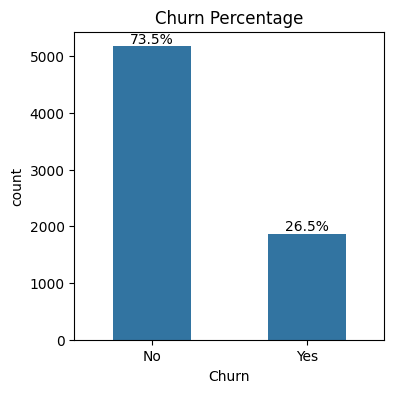

In [159]:
# checking how much significant is churn
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Churn',data = df, width=0.5)
plt.title('Churn Percentage')

# to show the percentage proportion
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x/len(df):0.1%}')
plt.show()

Around 1/4 th customers have churned out in last month which is significant to analyse and understand the customer need.

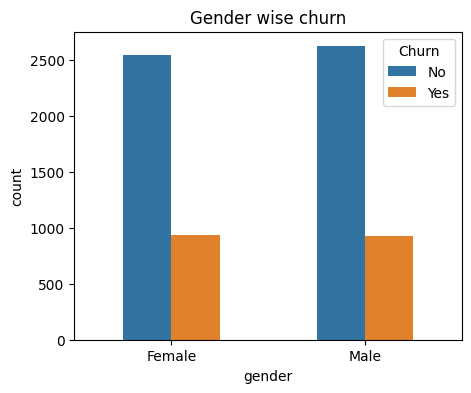

In [160]:
plt.figure(figsize=(5,4))
sns.countplot(data = df, x ='gender',hue='Churn',width=0.5)
plt.title('Gender wise churn')
plt.show()

In [161]:
# There is no significant impact of gender on churn.
# Let's check with the senior citizen

df[['Churn','SeniorCitizen']].value_counts()

,,count
Churn,SeniorCitizen,
No,0,4508
Yes,0,1393
No,1,666
Yes,1,476


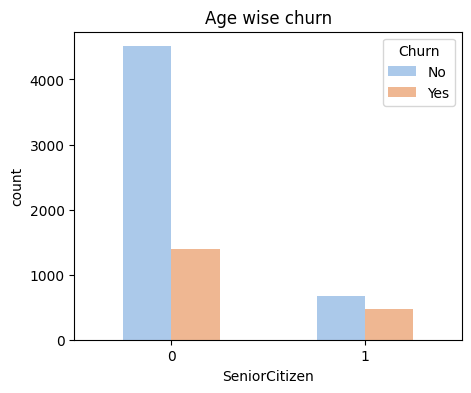

In [162]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data = df, x ='SeniorCitizen',hue='Churn',palette='pastel',width=0.5)
plt.title('Age wise churn')
plt.show()

<Figure size 400x500 with 0 Axes>

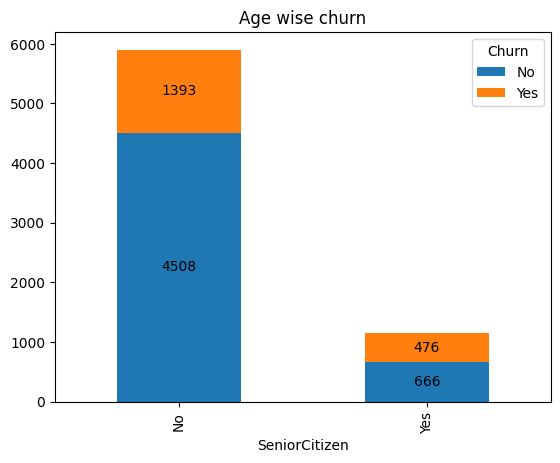

In [163]:
# analyse it more using a stacked bar plot

plt.figure(figsize=(4,5))
df2 = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()

ax = df2.plot(kind="bar", stacked=True)
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.title('Age wise churn')
plt.show()

In [164]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes


<ipython-input-200-5d638820b09f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x='Churn',y='tenure',palette='muted',width=0.5)


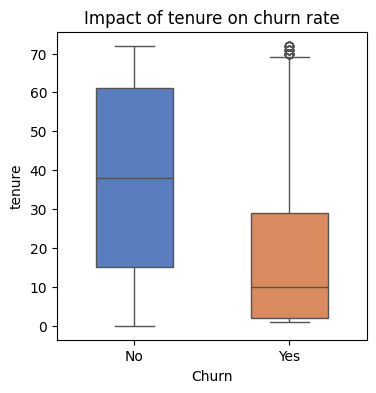

In [200]:
# analysing tenure over churn behaviour
plt.figure(figsize=(4,4))
sns.boxplot(data= df, x='Churn',y='tenure',palette='muted',width=0.5)
plt.title('Impact of tenure on churn rate')
plt.show()

In [169]:
# it is likely that users are leaving the service before 24 months. we need to find the reason for it, possibility of competittor in the market.
# there are few users which are still with the company after 70 months. we can give reward to them.

In [170]:
# how many are there after 70 months.
print((df['tenure'] > 70).value_counts())
# there are total 532 people which is a good number, can give some attention.

tenure
False    6511
True      532
Name: count, dtype: int64


In [171]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes


In [201]:
df1 = df[df['Churn'] == 'Yes']
df1['Contract'].value_counts()

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


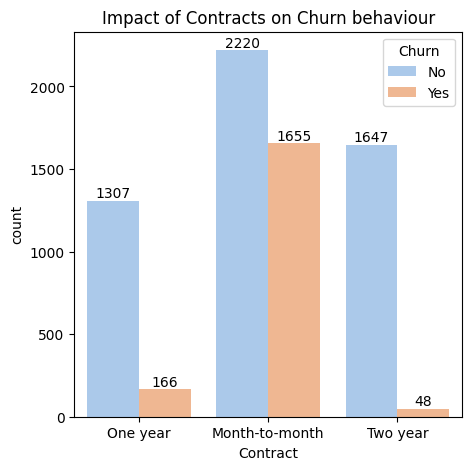

In [205]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x='Contract',hue='Churn',palette='pastel')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Impact of Contracts on Churn behaviour')
plt.show()

<ipython-input-213-a5bffa623d05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df,x='Churn', y='MonthlyCharges',palette='pastel',width=0.5)


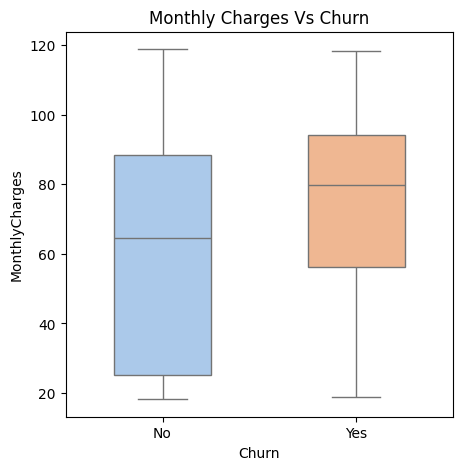

In [213]:
# There is very high churn for users choosing month-to-month contract.
# Checking impact of monthly charges over churn

plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df,x='Churn', y='MonthlyCharges',palette='pastel',width=0.5)
plt.title('Monthly Charges Vs Churn')
plt.show()

In [176]:
# It has been observed that monthly charges about $60 tending users to leave the service
# with monthly charges alone, we can't predict the user behaviour. lets analyze multiple columns to see why user left the service.
# analyse churn behaviour due to monthly charges with tenure, Contract, and InternetService

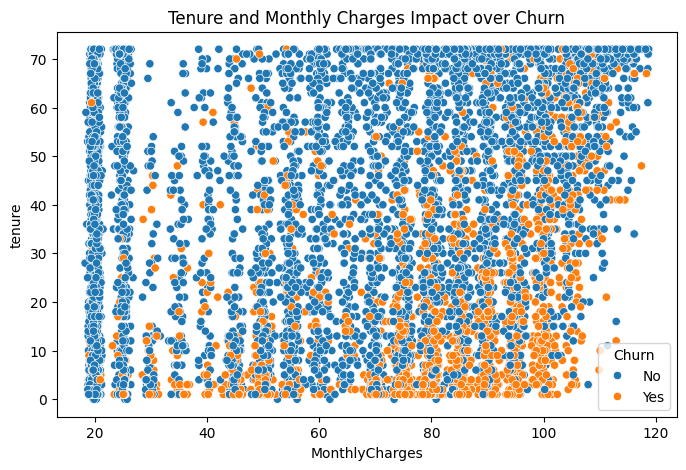

In [215]:
# Tenure vs. MonthlyCharges by Churn  - scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn')

plt.title('Tenure and Monthly Charges Impact over Churn')
plt.show()

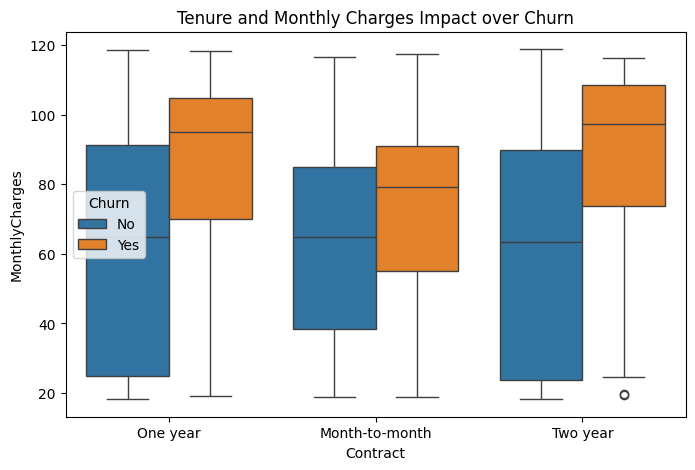

In [216]:
# users are tend to leave the service within a year when monthly charges are above $70.

# Contract vs. MonthlyCharges by Churn - boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Contract and Monthly Charges Impact over Churn')
plt.show()

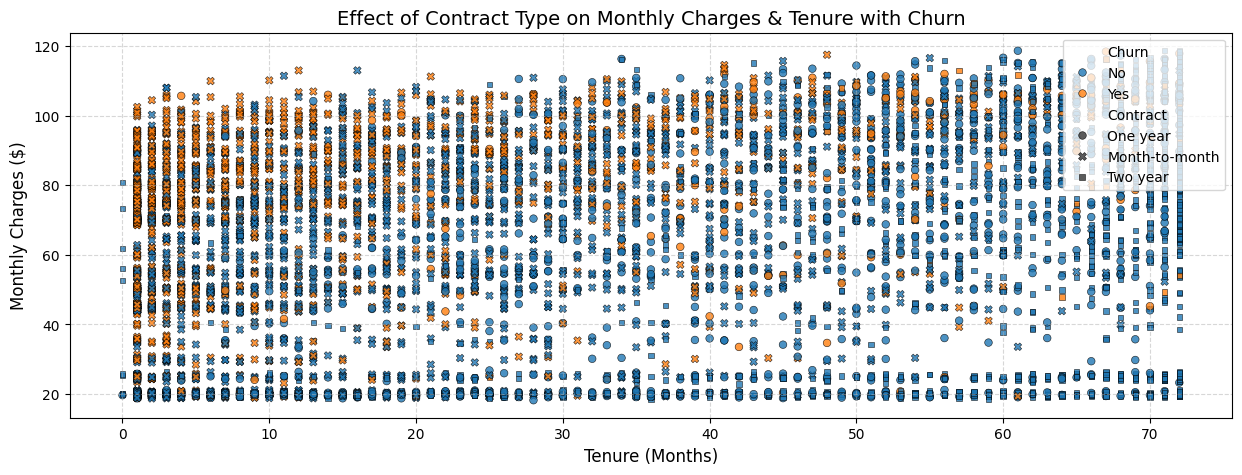

In [225]:
# Clearly it is seen that $70 is a deal breaker for the user churned behaviour
# Customer segmentation would be -
    # Low tenure, high monthly charges → High churn risk.
    # Long tenure, stable payments → Loyal customers.
    # Mid-range tenure, mid-charges → Need further analysis.

# lastly, effect of Contract type on the relationship between MonthlyCharges, tenure, and Churn
plt.figure(figsize=(15, 5))
scatter = sns.scatterplot(
    data=df, x="tenure", y="MonthlyCharges", hue="Churn", style="Contract", alpha=0.8, s=30, edgecolor="black"
    )
plt.legend(loc="upper right")  # Move legend to the top right
plt.title("Effect of Contract Type on Monthly Charges & Tenure with Churn", fontsize=14)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Monthly Charges ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
